# **1.- Introduction**

The favorable reception that artificial intelligence has had in society in recent years has highlighted its capabilities, and many of us will agree that it has made our daily lives easier. Of course, this power and these capabilities are the result of many years of extensive research, which continues today with numerous and diverse lines of investigation, showing signs that artificial intelligence will have a prominent presence in the near future. As such, behind this surge driven by exhaustive research, there are numerous fields, characteristics, proposals and discoveries, such as data collection and processing techniques, advanced artificial intelligence techniques and architectural proposals for building models. It is this last field, perhaps, that has sparked the greatest interest in recent years, thanks to the potential that neural-based machine learning and deep learning have demonstrated in solving highly complex machine learning tasks, tasks that, until not long ago, were considered long-term challenges.

But what are those two fields and how have they managed to establish themselves as the main characters in building artificial intelligence models? In simple terms, neural-based machine learning and deep learning are subfields of machine learning based on the concept of the artificial neuron as the foundation for solving various tasks in this field. Although there is no formal distinction between where neural-based machine learning ends and where deep learning begins, it is generally agreed that neural networks of various hidden layers are the building blocks of deep learning, whereas neural-based machine learning encompasses a wide array of configurations over artificial neurons. While this concept may seem complex, and it is true that cutting-edge deep learning models integrate a wide range of sophisticated techniques built upon this foundation, the underlying theoretical and mathematical principles are not as complicated as they might seem. Essentially, an artificial neuron is a function that takes an input data point, computes a linear combination of its numerical values, and then typically applies a nonlinear function $\sigma$ to the result.

This model, built on Frank Rosenblatt's perceptron (which, at the same time, can be considered an interpretation of the neural model introduced by McCulloch and Pitts in 1943), represents an attempt to model the functioning mechanism of neurons. Neurons constantly modulate the electrical flow that passes through them, and depending on the characteristics of this flow and the neuron's physiology, they produce a specific output. In any case, does this model yield good results when constructing models, whether simple or complex, based on this architecture? Furthermore, can we say that the model accurately represents, from both a biological and functional perspective, the mechanisms by which neurons operate? The reason behind these questions is that if the key to developing artificial intelligence models with great capabilities lies in integrating or simulating the neuronal mechanisms of living beings, then a biologically plausible neural model could be a reasonable research objective.

That is the hypothesis this notebook aims to cover, by introducing the implementation of a biologically plausible neural model that integrates the quadratic integrate-and-fire formulation into the modern perceptron to enhance its capacity. As developed in the Bachelor's Thesis *Toward Biologically Plausible Representations of Neural Activity in Artificial Intelligence*, this notebook will cover all the architectural and training details that are necessary to implement that neural model, and we will try to solve the concentric circumferences problem. In addition, common implementations of logistic regressors will also be included to compare those implementations with the capacity of this new model.

Let's begin by loading all the packages and configurations that we will need throughout the notebook:

In [1]:
##################################### Packages and configurations #####################################
# LaTeX installation for better-looking plots.
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

# Graphical packages.
import matplotlib.pyplot as plt

# Data representation packages.
import numpy as np

# Neural machine learning packages.
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from abc import ABC, abstractmethod

# Other packages.
from time import time

# Configuration.
np.random.seed(123)
plt.rcParams.update({
    "mathtext.fontset": "cm", # Use LaTeX's Computer Modern font for math.
    "font.family": "serif", # Use serif family (mathematical fonts will be rendered correctly).
    'text.usetex': True,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})
#######################################################################################################

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


# **2.- Generation of the Dataset**

Before addressing any problem, it is important to have a dataset on top of which to work. The following cell generates the dataset that corresponds to the concentric circumferences problem:

In [2]:
#################### Dataset for CC ####################
X_train, y_train = datasets.make_circles(n_samples=100, noise=0, factor=0.4)
########################################################

Let's plot the dataset to better understand the problem we want to solve:

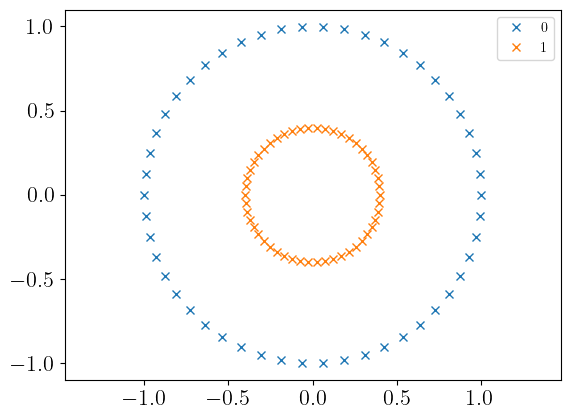

In [3]:
################### Plotting of the dataset ###################
plt.plot(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], 'x', label = '0')
plt.plot(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], 'x', label = '1')
plt.axis('equal')
plt.legend()
###############################################################

The idea is that our neural model will have to learn that instances in the inner circumference belong to the class 1, whereas those in the outer circumference belong to the class 0.

# **3.- Common Logistic Regressors**

As baselines against which we can compare our model, this section offers three common implementations of logistic regressors that will be used to try to solve the concentric circumferences problem. *scikit-learn*, *Tensorflow* and *PyTorch* have been chosen, and this section covers how they can be employed to try to solve this binary classification problem. We offer the code for training those models and for evaluating it through accuracy, so further experiments can be deployed by adapting the code (for example, to calculate the maximum accuracy the model can obtain in 50 trials).

## **3.1.- Building a Simple Logistic Regressor I: *scikit-learn***

As commented, this first subsection will include the code needed to train and evaluate a logistic regressor on top of the concentric circumferences dataset. Since our model is trained through gradient descent, training in this case will also be done with that algorithm.

To begin, the following cell creates the logistic regressor, trains it for 50 iterations and registers the time needed to complete the training process. Hyperparameters have been fixed to make all models as comparable as possible, but you can play with different values.

In [ ]:
############# Logistic Regressor: scikit-learn #############
# Classifier instance.
sgd_classifier = SGDClassifier(
  loss='log_loss',
  max_iter=50,
  tol=None,
  learning_rate = 'constant',
  eta0 = 0.001
)

# Training.
t1 = time()
sgd_classifier.fit(X_train, y_train)
t2 = time()

print(f'Time needed to train the model: {t2-t1} s.')
############################################################

Time needed to train the model: 0.00395512580871582 s.


As we can see, the time taken to train the model is significantly small. That is a good indicator of the implementation being efficient, but let's see if what the model has learnt is actually a valid solution. The following cell checks the accuracy of the model on the concentric circumferences dataset:

In [ ]:
##################### Accuracy on CC #####################
acc = accuracy_score(y_train, sgd_classifier.predict(X_train))
print(f'Accuracy on concentric circumferences: {acc}.')
###########################################################

Accuracy on concentric circumferences: 0.5.


Well, results are not that good. The line the model has learnt to separate the instances belonging to one class from the instances belonging to the other class is ineffective. You may perform more trials, but results will not improve that much.

## **3.2.- Building a Simple Logistic Regressor II: *Tensorflow***

We will now do the exact same procedure but working with *Tensorflow*. The following cell builds the architecture for a logistic regressor and trains it for 50 epochs over the concentric circumferences dataset (we have taken the same hyperparameters for comparison, but they can be changed to see how they have an effect on performance):

In [ ]:
############# Logistic Regressor: Tensorflow #############
# Architecture of the model and compilation.
model_tf = Sequential([
  Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])
model_tf.compile(
  optimizer=SGD(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['accuracy']
)

# Training.
t1 = time()
history = model_tf.fit(
  X_train,
  y_train,
  epochs=50,
  batch_size=1,
  verbose=0
)
t2 = time()

print(f'Time needed to train the model: {t2-t1} s.')
##########################################################

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time needed to train the model: 13.80076551437378 s.


In this case, training takes a little longer, but 13.8 seconds for 50 iterations is not that bad. In any case, let's see if the model has learnt something meaningful:

In [ ]:
##################### Accuracy on CC #####################
acc = accuracy_score(y_train, np.round(model_tf.predict(X_train)))
print(f'Accuracy on concentric circumferences: {acc}.')
###########################################################

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Accuracy on concentric circumferences: 0.5.


As expected, results are not that good in this case either. Other executions could result in the accuracy being higher or lower, but don't expect marvelous results.

## **3.3.- Building a Simple Logistic Regressor III: *PyTorch***

To end with this section, we will perform the exact same analysis but working on *PyTorch*. Since this library employs its own data type, we will first transform the dataset into a *PyTorch*-compatible type. The following cell does so:

In [ ]:
##################### PyTorch dataset creation #####################
# Numpy to PyTorch.
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.from_numpy(y_train).float().unsqueeze(1)

# Dataset generation.
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Device configuration.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
####################################################################

We shall now define the logistic regressor class that we will train to try to solve the concentric circumferences problem:

In [ ]:
################ Logistic regressor class ################
class LogisticRegressor(nn.Module):
  def __init__(self, input_dim):
    '''
    This method instantiates an object of the class LogisticRegressor. It
    simply defines the architecture of a logistic regressor: Linear + Sigmoid.

    Input:
      -- input_dim: The number of input dimensions.
    Output:
      -- None.
    '''

    super().__init__()

    self.linear = nn.Linear(input_dim, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    '''
    This method performs the forward pass of the model. It simply
    takes the input data, applies the linear combination and then
    the sigmoidal activation function.

    Input:
      -- x: The input data.
    Output:
      -- out: The output of the model.
    '''

    return self.sigmoid(self.linear(x))
##########################################################

Let's now train the model for 50 iterations, employing the same hyperparameters as in the previous cases:

In [ ]:
############# Logistic Regressor: PyTorch #############
# Instantiation of the model, loss and optimiser.
model = LogisticRegressor(X_train.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training.
n_epochs = 50
t1 = time()
for epoch in range(n_epochs):
  model.train()
  for xb, yb in train_loader:
    xb, yb = xb.to(device), yb.to(device)
    optimizer.zero_grad()
    preds = model(xb)
    loss = criterion(preds, yb)
    loss.backward()
    optimizer.step()
t2 = time()

print(f'Time needed to train the model: {t2-t1} s.')
############################################################

Time needed to train the model: 4.095108270645142 s.


Well, in this case, we have something in between. The model trains quickly, but how about its performance? The following cell calculates the model's accuracy on the concentric circumferences problem:

In [ ]:
##################### Accuracy on CC #####################
model.eval()
with torch.no_grad():
  preds = model(X_train_t.to(device))
  predicted = (preds.cpu().numpy() >= 0.5).astype(int)
  acc = (predicted == y_train.reshape(-1,1)).mean()
print(f'Accuracy on concentric circumferences: {acc}.')
###########################################################

Accuracy on concentric circumferences: 0.66.


Although results are better, the model exhibits suboptimal performance.

# **4.- Implementation of a Biologically Plausible Neural Model**

It is time to introduce our biologically inspired neural model and evaluate its capacity to solve the concentric circumferences problem. Recall that the integration of time and the quadratic integrate-and-fire formulation makes this model different from traditional logistic regressors. However, we have developed the whole formulation so that typical deep learning training schemes are compatible with this neural model. This section aims to implement the whole architecture as specified in *Toward Biologically Plausible Representations of Neural Activity in Artificial Intelligence*.

Befofe delving into architectural details, we will first define our discrete time range on which we will test how signals evolve over time. The following cell creates an array with evenly spaced elements, such that the lower and upper bounds are 0 and 2, respectively, and it contains 10000 elements. We think this provides enough numerical precision for signals to show detailed patterns that the QIF formulation determines, but other values could be tested.

In [4]:
######### Discrete time range #########
L = 10000
t = np.linspace(0, 2, L)
#######################################

In addition, before training the model on the whole dataset and in order to check each implemented component works as expected, we will take one specific example and conduct several tests. The following cell takes one example from the dataset and it applies the zero-order hold transformation to obtain a signal that will be employed to test the components we will implement afterwards:

In [5]:
######################## One example to test components ########################
example_x = X_train[1]
example_y = y_train[1]
example_x_time = np.array([ [example_x[0]]*10000, [example_x[1]]*10000]).T
################################################################################

## **4.1.- Implementation of the Architecture and Training Components**

Perfect! Let's start implementing the architectural and training components of our model.

### **4.1.1.- Data Transformation Strategies**

Before implementing the model architecture and the forward pass, we need to have input data transformed accordingly so that data is converted to a vector of discrete functions $\{X_1, \dots, X_n \}$. In the report we comment on two techniques that we have devised, whose implementation will be given in this subsection.

#### **4.1.1.1.- Discrete Zero-Order Hold Model**

We consider this to be the most intuitive and simple approach as to how inputs stimulate neurons. Given a feature vector $(x_1, \dots, x_n)$ and after defining a time window $[0,T]$ for the stimulation period, its time-dependent representation will be defined as follows:
$$
(x_1(t), \dots, x_n(t)) =
\begin{cases}
    (x_1,\dots,x_n), & \text{if} \hspace{0.2cm} t \in [t_1, t_2] \subseteq [0,T], \\
    (0,\dots,0) & \text{else},
\end{cases}
$$
where $t_1$ and $t_2$ represent the limits of the input injection time range. In other words, this will be an $n$-dimensional rectangular signal; for time steps outside the injection range, $[0,t_1) \cup (t_2,T]$, the neuron will receive no input at all (after calculating the linear combination, we have that $(w_1, \dots, w_n) \cdot (0, \dots, 0) = 0$), but for all the time steps in the injection range $[t_1,t_2]$, the neuron will receive a constant input. It is reasonable to argue that for a sufficiently long stimulation and injection period, the neuron will have had enough time to either fire or not (or, at least, to fire either more or less frequently).

In our discrete-time implementation, though, after defining a time range $[0, T]$, divided into $L$ discrete and evenly spaced points, as well as a subset $[l_1, l_2] \subseteq \{0, \dots, L-1\}$, given a feature vector $(x_1, \dots, x_n)$, its rectangular signal will be defined as $(0, \dots, 0), \ \forall l $ $\not \in [l_1, l_2]$ and as $(x_1, \dots, x_n), \ \forall l \in [l_1, l_2]$, or equivalently, as $(0, \dots, 0), \ \forall t \not \in [t_{l_1}, t_{l_2}]$ and as $(x_1, \dots, x_n), \ \forall t \in [t_{l_1}, t_{l_2}]$.

After commenting on the details of this approach, the following function contains the implementation of this method:

In [6]:
############################ Zero-order hold transformation ############################
def zeroOrderHold(X, L, t1, t2):
  '''
  This function applies the zero-order hold transformation to a given dataset
  of instances containing discrete features such that those features are
  transformed to discrete signals instead.

  Input:
    -- X: Dataset to transform. Shape: (num_examples, num_features).
    -- L: Length of the time window (number of samples for the discrete signal).
    -- t1: Lower bound of the input injection time range.
    -- t2: Upper bound of the input injection time range.
  Output:
    -- X_time: Transformed dataset. Shape: (num_examples, L, num_features).
  '''

  X_time = np.zeros((len(X),len(t),2))
  for i in range(len(X)):
    example_X = X[i]
    example_X = np.array([ [example_X[j]]*L for j in range(len(example_X)) ]).T
    X_time[i] = example_X

  X_time[:,:t1,:] = 0
  X_time[:,t2+1:,:] = 0
  return X_time
########################################################################################

Let's create our transformed dataset:

In [7]:
################## Dataset transformation ##################
t1 = 0
t2 = L-1
X_train_zoh = zeroOrderHold(X_train, L, t1, t2)
############################################################

Finally, we shall visualise how one of our discrete signals looks:

/tmp/ipython-input-8-4073402651.py:51: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([np.min(X_train_zoh[-1].T[0]), np.max(X_train_zoh[-1].T[0])])
/tmp/ipython-input-8-4073402651.py:52: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim([np.min(X_train_zoh[-1].T[1]), np.max(X_train_zoh[-1].T[1])])


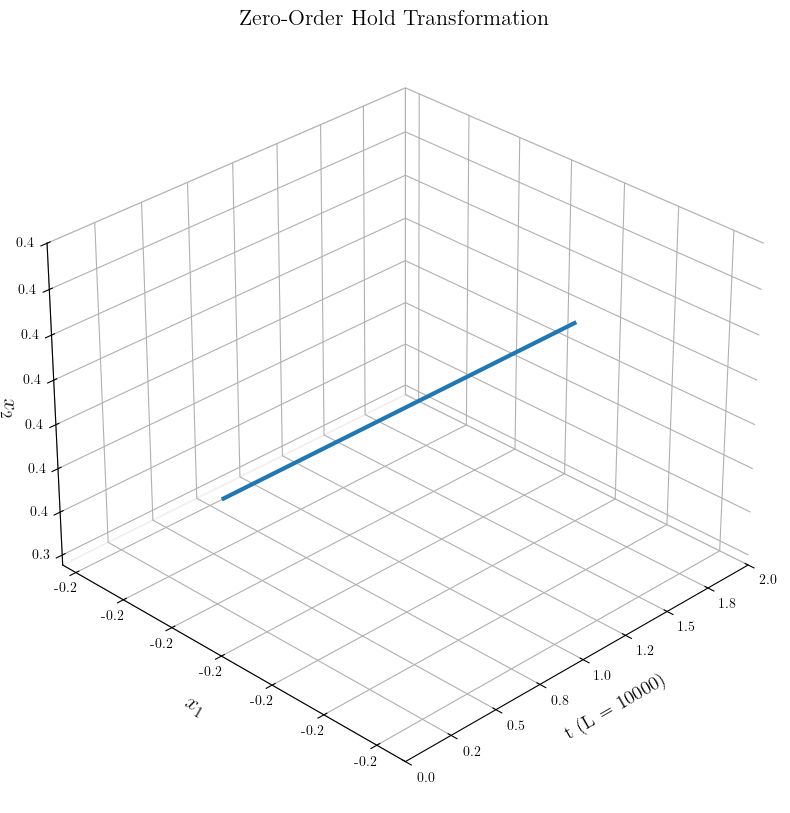

In [8]:
#################################### Plotting of the dataset ####################################
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111, projection='3d')

# Draw a continuous line through (x[i], y[i], z[i])
ax.plot(xs = t, ys = X_train_zoh[-1].T[0], zs = X_train_zoh[-1].T[1], lw=3)

# Disable axis background.
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Adjust viewing angle for a nice perspective.
ax.view_init(elev=30, azim=225)

# Reduce font size for tick labels.
ax.tick_params(axis='x', labelsize=10, pad = 1)
ax.tick_params(axis='y', labelsize=10, pad = 1)
ax.tick_params(axis='z', labelsize=10, pad = 1)

# Shift X-Axis Tick Labels
ticks = ax.get_xticks()
labels = [f"{tick:.1f}" for tick in ticks]  # Format labels.
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

for label in ax.xaxis.get_majorticklabels():
    label.set_verticalalignment('center')  # Keep vertical alignment.
    label.set_horizontalalignment('left')  # Move slightly to the right.

# Shift Y-Axis Tick Labels
ticks = ax.get_yticks()
labels = [f"{tick:.1f}" for tick in ticks]  # Format labels.
ax.set_yticks(ticks)
ax.set_yticklabels(labels)

for label in ax.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')  # Keep vertical alignment.

# Shift Z-Axis Tick Labels
ticks = ax.get_zticks()
labels = [f"{tick:.1f}" for tick in ticks]  # Format labels.
ax.set_zticks(ticks)
ax.set_zticklabels(labels)

for label in ax.zaxis.get_majorticklabels():
    label.set_verticalalignment('center')  # Keep vertical alignment.

# Label axes.
ax.set_xlim([np.min(t), np.max(t)])
ax.set_ylim([np.min(X_train_zoh[-1].T[0]), np.max(X_train_zoh[-1].T[0])])
ax.set_zlim([np.min(X_train_zoh[-1].T[1]), np.max(X_train_zoh[-1].T[1])])
ax.set_xlabel('t (L = 10000)', fontsize =14, labelpad=5)
ax.set_ylabel('$x_1$', fontsize = 16, labelpad=5)
ax.set_zlabel('$x_2$', fontsize = 16, labelpad=-2)

plt.title('Zero-Order Hold Transformation', fontsize=16)
plt.savefig('zoh.png', dpi=300)
plt.show()
#################################################################################################

As expected, this is a straight line!

#### **4.1.1.2.- Dynamical Source of Input**

The second alternative we propose is an enhancement to the zero-order hold, where, instead of inputting a constant input in an interval $[l_1, l_2]$, that interval is split into contiguous windows of the same length and a minor transformation is applied (the same one for all the constant samples that lie in that window) to modulate the data, so that the neuron can understand and incorporate the time-dependent input into its rich dynamics. Therefore, for each feature of an instance, instead of having a single interval $[l_1, l_2]$ in which a constant value is injected into the neuron, we will have $S$ intervals, each carrying a different constant value. Moreover, the signal will evolve gradually from one window to the next. In our implementation, we will employ dot-sinusoidal transformations, as they enable smooth transitions between adjacent windows, so we believe they can be suitable candidates. However, feel free to modify the code and include other transformations.

The following function implements the dynamical source of input strategy:

In [9]:
############################ Dynamical source of input transformation ############################
def dynamicalSourceInput(X, S, L, t1, t2):
  '''
  This method transforms a static dataset X (shape [N, 2])
  into a time‑gated dataset of shape [N, L, 2], divided into
  S sequential windows. In window i, the input at each time
  step is the dot product of the original x = (x1, x2) with
  the unit direction (cos(2πi/K), sin(2πi/K)). Note that we
  restric this method to R^2.

  Input:
    -- X: Dataset to transform. Shape: (num_examples, num_features).
    -- S: Number of sequential windows.
    -- L: Total number of time steps. Split will be done as evenly as
          possible across the S windows.
    -- t1: Lower bound of the input injection time range.
    -- t2: Upper bound of the input injection time range.
  Output:
    -- X_time: Transformed dataset. Shape: (num_examples, L, num_features).
  '''

  N, D = X.shape
  assert D == 2, "Input dataset must have shape [N, 2]"

  # Determine lengths of each window (evenly distribute remainder).
  base_len = L // S
  rem = L % S
  lengths = [base_len + (1 if i < rem else 0) for i in range(S)]

  # Precompute S unit‑direction vectors.
  angles = np.arange(S) * (2 * np.pi / S)
  dirs = np.stack([np.cos(angles), np.sin(angles)], axis=1)

  # Initialisation of the discrete signal.
  X_time = np.zeros((N, L, 2), dtype=np.float64)

  # Transformation of each instance via the dot product of x_i and the i-th
  # sinusoidal transformation.
  idx = 0
  for i in range(S):
    li = lengths[i]
    direction = dirs[i] # Take the i-th pair of computed (cos, sin).
    X_time[:, idx:idx+li, :] = X[:, None, :] * direction[None, None, :] # Apply transformation to all the instances for that window at once.
    idx += li

  X_time[:,:t1,:] = 0
  X_time[:,t2+1:,:] = 0
  return X_time
##################################################################################################

Let's create this new dataset:

In [10]:
################## Dataset transformation ##################
t1 = 0
t2 = L-1
S = 12
X_train_dsi = dynamicalSourceInput(X_train, S, L, t1, t2)
############################################################

Finally, we shall visualise how this discrete signal looks:

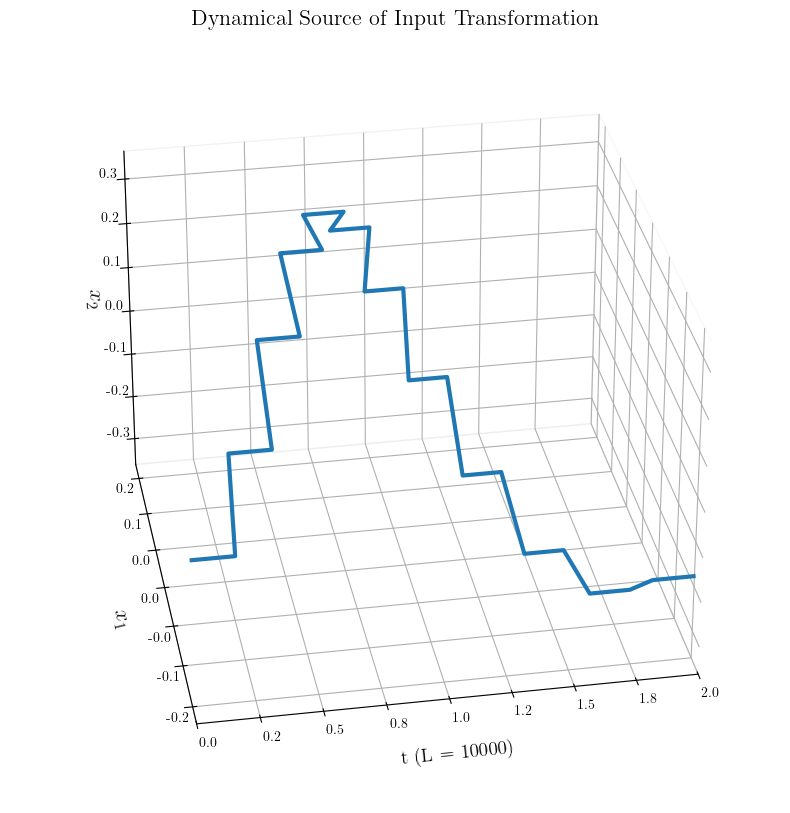

In [11]:
#################################### Plotting of the dataset ####################################
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111, projection='3d')

# Draw a continuous line through (x[i], y[i], z[i])
ax.plot(xs = t, ys = X_train_dsi[-1].T[0], zs = X_train_dsi[-1].T[1], lw=3)

# Disable axis background.
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Adjust viewing angle for a nice perspective.
ax.view_init(elev=30, azim=260)

# Reduce font size for tick labels.
ax.tick_params(axis='x', labelsize=10, pad = 1)
ax.tick_params(axis='y', labelsize=10, pad = 1)
ax.tick_params(axis='z', labelsize=10, pad = 1)

# Shift X-Axis Tick Labels
ticks = ax.get_xticks()
labels = [f"{tick:.1f}" for tick in ticks]  # Format labels.
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

for label in ax.xaxis.get_majorticklabels():
    label.set_verticalalignment('center')  # Keep vertical alignment.
    label.set_horizontalalignment('left')  # Move slightly to the right.

# Shift Y-Axis Tick Labels
ticks = ax.get_yticks()
labels = [f"{tick:.1f}" for tick in ticks]  # Format labels.
ax.set_yticks(ticks)
ax.set_yticklabels(labels)

for label in ax.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')  # Keep vertical alignment.

# Shift Z-Axis Tick Labels
ticks = ax.get_zticks()
labels = [f"{tick:.1f}" for tick in ticks]  # Format labels.
ax.set_zticks(ticks)
ax.set_zticklabels(labels)

for label in ax.zaxis.get_majorticklabels():
    label.set_verticalalignment('center')  # Keep vertical alignment.

# Label axes.
ax.set_xlim([np.min(t), np.max(t)])
ax.set_ylim([np.min(X_train_dsi[-1].T[0]), np.max(X_train_dsi[-1].T[0])])
ax.set_zlim([np.min(X_train_dsi[-1].T[1]), np.max(X_train_dsi[-1].T[1])])
ax.set_xlabel('t (L = 10000)', fontsize =14, labelpad=5)
ax.set_ylabel('$x_1$', fontsize = 16, labelpad=5)
ax.set_zlabel('$x_2$', fontsize = 16, labelpad=-2)

plt.title('Dynamical Source of Input Transformation', fontsize=16)
plt.savefig('dsi.png', dpi=300)
plt.show()
#################################################################################################

In this case, the shape is a little more complex, because the signal gets modulated over time, but the idea is the same. Try to use different S values to see how the graph changes, but in the end, leave $S=12$.

### **4.1.2.- Model Architecture**

The second class we will implement is the model itself, which will contain its parameterisation and the function that performs the forward pass. The following abstract class contains an interface for neural models that will be implemented through our formulation:

In [12]:
####################### Abstract class for neural models #######################
class NeuralModel(ABC):

  @abstractmethod
  def forward(self, x):
    '''
    Implementation of the forward pass (output of the model given an input).

    Input:
      -- x: Input data. Shape: (num_features,).
    Output:
      -- out:
    '''

    pass
################################################################################

Okay, but how can we implement our actual formulation of the perceptron? First of all, we need to create a set of parameters that will be employed to calculate the input to be injected and the reset value. We shall initialise them following the Xavier initialisation procedure for $w_i$ and a random uniform initialisation for $b$ and $\phi$. Other hyperparameters like $\kappa$ and $v_{\text{peak}}$ will also be set in this initialisation step.

Once the architecture has been defined, we only need to perform the forward pass. The complete explanation can be read in the report, but the idea is that we will integrate the input via $w_i$ and $b$ and use that input to determine a differential equation that will be numerically integrated using Euler's method. Since $v_0 = \phi$, Euler's method allows calculating a discrete function $v_l$ such that $v_l \approx v(t_l)$ via the following equations:
$$
\begin{cases}
  v_0 & \hspace{-0.3cm} = v(0) = \phi. \\
  v_{l+1} & \hspace{-0.3cm} = v_l + \Delta t \ f(t_l, v_l).
\end{cases}
$$
In this case, $\Delta t$ is the discretisation step determined when we created the discrete time range, whereas $f(t_l, v_l)$ refers to the time derivative of $v$ as determined in the quadratic integrate-and-fire formulation:
$$
f(t_l, v_l) = b + v^2(t_l) + I_{\text{Inj}}(t_l) = b + v^2_l + I_{\text{Inj}}(t_l).
$$

However, this formula will only be valid when no reset is needed. If at some point $v_l$ exceeds $v_{\text{peak}}$, we will have to find the value $t_k \in [t_{l-1}, t_l]$ for which $v(t_k) = v_{\text{peak}}$, reset voltage to $\phi$ and integrate the ODE from $t_k$ to $t_l$ to obtain the correct value for membrane voltage at that time step. This procedure will be conducted through linear interpolation, approximating $t_k$ as follows:
$$
t_k \approx t_l + \frac{v_{\text{peak}} - v_l}{v_{l+1} - v_l} (t_{l+1} - t_l).
$$

Finally, once $v_l$ has been computed, we will calculate $s_l$, integrate the function, multiply the gain factor and apply a sigmoidal function to obtain $\widehat{y}$. The forward method will output $\widehat{y}, v_l$ and $\{ t_{k,1}, \dots, t_{k,K} \}$, as will need those three elements to compute the gradient of the loss with respect to the learnable parameters.

After providing detailed explanations on how the architecture will be implemented, the following cell contains the implementation for the neural model:

In [13]:
################################# Neural QIF Perceptron #################################
class NeuralQIFODEPerceptron(NeuralModel):
  def __init__(self, input_dim, v_peak, activation_func='Sigmoid', gain = 10):
    '''
    This method instantiates an object from the class neural NeuralQIFODEPerceptron.
    The method generates a set of parameters following the initialisation procedures
    described above and stores essential hyperparameter values. Note that this model
    integrates the QIF formulation:
      dv/dt(t) = b + v^2(t) + \sum_{i=1}^n w_i * x_i(t).
      v(t) <- phi, if v(t) = v_peak.

    Input:
      -- input_dim: Number of features in input data.
      -- v_peak: Hyperparameter value for v_peak.
      -- activation_func: Activation function. Since the theoretical development
                          has been conducted considering the sigmoidal function,
                          we recommend sticking to it. Employing other activation
                          functions will require slightly modifying the whole derivation
                          of the main results for this model.
      -- gain: Hyperparameter value for the gain factor.
    Output:
      -- None.
    '''

    self.v_peak = v_peak
    self.parameters = self.initialize_parameters(input_dim) # Parameter initialisation.

    if activation_func == 'Sigmoid':
      self.activation_func = lambda x: 1 / (1 + np.exp(-x))
    elif activation_func == 'Tanh':
      self.activation_func = lambda x: np.tanh(x)

    self.gain = gain

  def initialize_parameters(self, input_dim):
    '''
    This auxiliary function initialises parameters following the Xavier
    initialisation procedure for w_i and a random uniform initialisation
    for b and phi.

    Input:
      -- input_dim: Number of features in input data.

    Output:
      -- parameters: Python dictionary, containing "W" "b" and "phi" as keys:
                       * W -- Integration coefficients. Shape: (1, input_dim).
                       * b -- bias. Shape: (1, 1).
                       * phi -- Reset value. Shape: (1, 1).
    '''

    parameters = {}
    parameters['W'] = np.random.randn(1,input_dim)*np.sqrt(1/input_dim)
    parameters['b'] = np.random.rand(1, 1)

    parameters['phi'] = np.random.randn(1,1)
    while parameters['phi'] > self.v_peak:
      parameters['phi'] = np.random.randn(1,1) # This is to ensure that the voltage reset value does not exceed v_peak.

    return parameters

  def forward(self, x_time, time_frame):
    '''
    Implementation of the forward pass (output of the model given an input).

    Input:
      -- x_time: Discrete signal corresponding to an instance of the dataset. Shape: (L, num_features).
      -- time_frame: Discrete time frame. Shape: (L,).

    Output:
      -- y_hat: Last value produced by the model, containing the confidence value for x_time belonging
                to class 1.
      -- vt: Discrete signal v_l.
      -- t_spikes: List of interpolated spike times.
    '''

    W = self.parameters['W']
    b = self.parameters['b']
    v = self.parameters['phi'] # v_0 = phi

    # Initialisation of vt and t_spikes.
    vt = np.empty_like(time_frame, dtype=float)
    t_spikes = []

    # Numerical integration of the ODE.
    for i in range(len(time_frame)-1):
      t, t_next = time_frame[i], time_frame[i+1] # We consider two time steps in each iteration
                                                 # so as to check for reset events.
      dt = t_next - t
      I_inj = W @ x_time[i] # Linear combination of w_j and x_time[i] will give current to inject.

      v_prev = v # Update v_prev so that current v can be computed via Euler's method.
      vt[i] = v_prev.item() # Store definitive value for v_l (by storing the previous one, we will
                            # have checked that it does not corresponds to a post-reset value, and
                            # if so, we will have had time to correct the value in the previous
                            # iteration. Storing v after calculating it via Euler's method is not
                            # correct, because we don't know whether v >= v_peak yet).
      dv = b + v_prev**2 + I_inj # f(t_l, v_l)
      v = v_prev + dt*dv # Euler's method.

      # If a super-peak value is detected:
      if v >= self.v_peak:
        t_spike = self.interpolate(t, t_next, v_prev, v, self.v_peak) # Interpolation of t_k.
        t_spikes.append(t_spike.item()) # Store t_k.

        dt2 = t_next - t_spike # Calculate the discretisation step for t_k and t_{l+1} so that
                               # Euler's method is applied from to t_k to obtain v_{l+1}. Note
                               # that this discretisation step will be smaller than the usual
                               # discretisation step employed.
        v_prev = self.parameters['phi'] # Voltage reset.
        dv = b + v_prev**2 + I_inj # Correct f(t_l, v_l).
        v = v_prev + dt2*dv # Euler's method from t_k to t_{l+1}.

    vt[-1] = v.item() # Since previous iteration values have been stored, we need to store the value
                      # corresponding to the last iteration.

    vt_normalized = self.activation_func(vt) - 0.5 # s(t)
    u = np.trapezoid(vt_normalized, time_frame) # Integration of s(t) through the trapezoidal rule.
    y_hat = self.activation_func(self.gain*u).item() # Output of the model.

    return y_hat, vt, t_spikes

  def __call__(self, x_time, time_frame):
    '''
    Implementation of the forward pass (output of the model given an input).

    Input:
      -- x_time: Discrete signal corresponding to an instance of the dataset. Shape: (L, num_features).
      -- time_frame: Discrete time frame. Shape: (L,).

    Output:
      -- y_hat: Last value produced by the model, containing the confidence value for x_time belonging
                to class 1.
      -- vt: Discrete signal v_l.
      -- t_spikes: List of interpolated spike times.
    '''

    return self.forward(x_time, time_frame)

  def interpolate(self, t_prev, t_current, v_prev, v_current, v_peak):
    '''
    This auxiliary function performs linear interpolation to obtain the value of t_k.

    Input:
      -- t_prev: Previous time step.
      -- t_current: Current time step.
      -- v_prev: Previous value of voltage.
      -- v_current: Current value of voltage.

    Output:
      -- t_k: Interpolated value of t_k, corresponding to the spike time.
    '''

    alpha = (v_peak - v_prev) / (v_current - v_prev)
    if alpha < 0:
        alpha = 0.0
    elif alpha > 1:
        alpha = 1.0

    return t_prev + alpha * (t_current - t_prev)
#########################################################################################

Let's see a small example to test all the components we have implemented. The following cell creates an instance of the class `NeuralQIFODEPerceptron`and performs the forward pass to obtain the output of the model, the trajectory $v_l$ and the set of spike time steps. In addition, it plots the signal $v_l$.

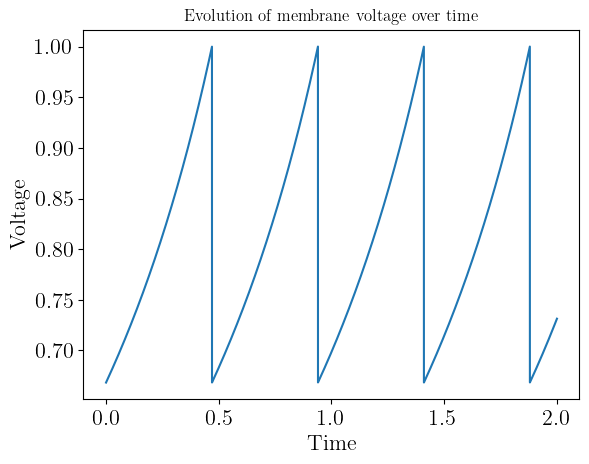

In [ ]:
################ Checking components ################
model = NeuralQIFODEPerceptron(2, 1)
y_hat, vt, t_spikes = model.forward(example_x_time, t)
plt.plot(t, vt)
plt.title('Evolution of membrane voltage over time')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.show()
#####################################################

Although not trained, we already see the model creates consistent trajectories that show spiking behaviour. Our goal will be to adapt that spiking behaviour to the inner structure of each class.

### **4.1.3.- Loss Function**

The next step consists of defining the loss function that will dictate whether the model is performing as expected or whether it needs more training. The following abstract class implements a general-purpose loss function that will be specified afterwards:

In [14]:
################################## Abstract class for the loss ##################################
class Loss(ABC):
  def __init__(self):
    '''
    The following method instantiates an object of the class Loss.
    It simply stores the value of the loss for a given set of instances
    (in case multiple instances are provided, loss will be the cost
    function, i.e., the mean of the individual losses), as well as the
    predicted output and the actual labels for the provided instances.

    Input:
      -- ∅.
    Output:
      -- None.
    '''

    self.cost = None # Galerarentzat balio numerikoa.
    self.Y = None
    self.Y_hat = None

  @abstractmethod
  def loss(self, Y_hat, Y):
    '''
    Implementation of the loss function.

    Input:
      -- Y_hat: Predicted output. Shape: (1, num_examples). If num_examples = 1, then it will be a scalar.
      -- Y: Actual labels. Shape: (1, num_examples). If num_examples = 1, then it will be a scalar.

    Output:
      -- cost: Total loss value.
    '''

    pass
#################################################################################################

Now, as commented on the report, since we are addressing binary classification problems in order to test all the components with minor difficulties, we will stick to the binary cross-entropy loss function. It offers a simple yet effective way of computing the performance of the model in the task to be solved. Binary cross-entropy loss is given by
$$
L(y, \widehat{y}) = - [y \ln(\widehat{y}) + (1-y) \ln (1 - \widehat{y})].
$$
The following class implements this loss function:

In [15]:
######################################### Binary cross-entropy loss class #########################################
class CrossEntropyLoss(Loss):
  def __init__(self):
    '''
    The following method instantiates an object of the class CrossEntropyLoss.
    It simply stores the value of the loss for a given set of instances
    (in case multiple instances are provided, loss will be the cost
    function, i.e., the sum of the individual losses), as well as the
    predicted output and the actual labels for the provided instances.

    Input:
      -- ∅.
    Output:
      -- None.
    '''

    super().__init__()

  def loss(self, Y_hat, Y):
    '''
    Implementation of the loss function.

    Input:
      -- Y_hat: Predicted output. Shape: (1, num_examples). If num_examples = 1, then it will be a scalar.
      -- Y: Actual labels. Shape: (1, num_examples). If num_examples = 1, then it will be a scalar.

    Output:
      -- cost: Total loss value.
    '''

    Y = Y.reshape(1, 1)
    Y_hat = np.array([Y_hat]).reshape(1, 1)
    m = Y.shape[1]
    eps = 1e-8 # For numerical stability.

    c = np.sum(Y*np.log(Y_hat+eps) + (1-Y)*np.log(1-Y_hat+eps)) # Vectorial calculation of cross-entropy
    cost = -c/m # Cost as the mean loss function.
    cost = np.squeeze(cost)

    assert cost.shape == () # Sanity check

    self.cost = cost
    self.Y = Y
    self.Y_hat = Y_hat.reshape(1,1)

    return self.cost

  def __call__(self, Y_hat, Y):
    '''
    Implementation of the loss function.

    Input:
      -- Y_hat: Predicted output. Shape: (1, num_examples). If num_examples = 1, then it will be a scalar.
      -- Y: Actual labels. Shape: (1, num_examples). If num_examples = 1, then it will be a scalar.

    Output:
      -- cost: Total loss value.
    '''

    return self.loss(Y_hat, Y)
###################################################################################################################

Let's do a little test to see whether the implementation is correct. The following cell instantiates an object of the class `CrossEntropyLoss` and computes binary cross-entropy between the previously predicted class confidence and the label assigned to the example:

In [ ]:
################# Test loss function #################
criterion = CrossEntropyLoss()
criterion(y_hat, np.int64(1))
######################################################

np.float64(0.021715625594318364)

Everything working as expected so far!

### **4.1.4.- Backpropagation**

The third component to implement is the computation of the gradient of the loss with respect to the trainable parameters. This requires employing the formulas introduced in the report, but we will address how everything is done step by step. First of all, the following abstract class defines a general-purpose backpropagator that enables performing the backward pass in a neural model:

In [16]:
################################## Abstract class for the backpropagator ##################################
class Backpropagator(ABC):
  def __init__(self, model: NeuralModel, loss: Loss):
    '''
    This method instantiates an object from the class Backpropagator. It stores
    the model to optimise as well as the loss function that is being used to
    obtain an estimation of the model's performance.

    Input:
      -- model: Neural model.
      -- loss: Loss function.
    Output:
      -- None.
    '''

    self.model = model
    self.loss = loss
    self.grad = None

  @abstractmethod
  def backward(self):
    '''
    Implementation of the backward pass. This method computes the gradient of
    the loss with respect to the learnable parameters, stores the gradient and
    outputs it.

    Input:
      -- ∅.
    Output:
      -- grad: Gradient of the loss with respect to the learnable parameters.
    '''

    pass
###########################################################################################################

Now, we need to compute the gradient of the loss. Unlike traditional deep learning, where the gradient of the loss can be computed by employing standard vector/matrix operations, this case requires solving the adjoint differential equation to obtain the gradient of the loss. In principle, now that we have introduced how numerical methods can be applied to integrate differential equations, as well as that interpolation techniques can be employed to insert reset constraints, it should not be especially tedious to understand how the backward pass can be implemented. Moreover, since we have access to the spike time steps $\{ t_1, \dots, t_K \}$, we do not need to do additional calculations. Therefore, solving the adjoint differential equation is the main challenge in the backward pass.

At this point, you may have noticed that there is an issue that prevents applying the Euler method the way we have introduced it. Note that we know both the terminal condition of the adjoint variable, $\lambda(T) = 0$, and the reset constraints, $\lambda(t_k^-) = 0$, but in order to apply the Euler method, we need to know the value of $\lambda(0)$. How can we solve this problem? Fortunately, the Euler method can be applied to approximate $\lambda(t)$ via $\lambda_l$, as usual, but by taking $\lambda_{L-1} = \lambda(T)$ and integrating the differential equation backward. In fact, if $\lambda(t)$ satisfies the differential equation
$$
\frac{d \lambda}{dt}(t) = -\lambda(t) \frac{df}{dv}(v(t)) + \frac{\delta L}{\delta v}(t),
$$
then, its reflected function $\lambda'(t)$ will satisfy the following differential equation:
$$
\frac{d \lambda'}{dt}(t) = \lambda'(t) \frac{df}{dv}(v(t)) - \frac{\delta L}{\delta v}(t).
$$

We can make use of this property to numerically integrate the previous differential equation by employing the Euler method after setting $\lambda_0' = \lambda(T) = 0$; the integration method is applied exactly the same way. Therefore, for every value $\lambda_l'$ we calculate, we will also have obtained the value of $\lambda_{L-l}$.

However, there are some additional aspects that we need to polish in order to effectively implement the backward pass. First of all, even though we know when resets must occur, we need to compute and store the values $\lambda(t_k^+)$, because the partial derivative of the loss with respect to $\phi$ requires computing those values. However, it is not that trivial to obtain the values $\lambda(t_k^+)$. If $t_k$ lands between two values $t_{l-1}$ and $t_l$, we will need to apply interpolation techniques to approximate $\lambda(t_k^+)$. Moreover, once $\lambda(t_k^+)$ has been computed, we will need to reset the adjoint variable by setting $\lambda(t_k^-) = 0$ and continue to integrate from $t_k^-$ to $t_{l-1}$ (recall that we are integrating the differential equation backward) in order to obtain $\lambda_{l-1}$. In case no spike lies in the interval $[t_{l-1}, t_l]$, we will apply the Euler method as usual:
$$
\lambda_{l-1} = \lambda_l + (t_l - t_{l-1}) \left( \lambda_l \frac{df}{dv}(v(t_l)) - \frac{\delta L}{\delta v}(t_l) \right).
$$
Note that in our case $\frac{df}{dv}(t) = 2v(t)$ and $\frac{\delta L}{\delta v}(t) = \kappa (\hat{y} - y) \sigma'(v(t))$.

Once the adjoint has been computed, calculating the partial derivatives is straightforward.

Considering everything explained in this subsection, the following cell implements the backward pass of the training procedure that enables computing the gradient of the loss with respect to the learnable parameters:

In [17]:
################################## Class for the backpropagator ##################################
class BackpropagationPerceptronCEL(Backpropagator):
  def __init__(self, model: NeuralQIFODEPerceptron, loss: CrossEntropyLoss):
    '''
    This method instantiates an object from the class BackpropagationPerceptronCEL.
    It stores the model to optimise as well as the loss function that is being used
    to obtain an estimation of the model's performance.

    Input:
      -- model: Neural model.
      -- loss: Loss function.
    Output:
      -- None.
    '''

    super().__init__(model, loss)

  def backward(self, v, time_grid, t_spikes, X, print_adjoint = False):
    '''
    Implementation of the backward pass. This method computes the gradient of
    the loss with respect to the learnable parameters, stores the gradient and
    outputs it.

    Input:
      -- ∅.
    Output:
      -- grad: Gradient of the loss with respect to the learnable parameters.
    '''

    N = len(time_grid) # Length of the discrete signal.

    t_spikes = t_spikes[::-1] # We reverse the set of spikes, since we will integrate
                              # the adjoint ODE backwards.
    j_sp = 0 # Control of the number of spikes that have been processed.
    M = len(t_spikes) # Control that no more than the existing spikes are processed.
    lam_s_pluses = [] # Store lambda(t_k^+) for the partial derivative of L with respect to phi.

    # Local derivatives.
    sigma_p = self.derivative(v) # Derivative of the sigmoid.
    df_dv = 2.0*v # Derivative of f with respect to v.

    # Running-loss drive: r(t_k) = dL/dv.
    Y_hat = self.loss.Y_hat
    Y = self.loss.Y
    r = (self.model.gain * (Y_hat - Y) * sigma_p).squeeze() # Computed via the chain rule.

    # ------------------ Adjoint sweep (lambda[T]=0) ------------------ #
    lam = np.zeros_like(v) # Initialisation of lambda.
    # Backward integration of the ODE:
    for k in range(N-1, 0, -1):
      # Selection of the time steps for the integration of the ODE.
      t_k = time_grid[k]
      t_km1 = time_grid[k-1]
      dt = t_k - t_km1

      # If a spike event has been detected -> Reset adjoint to phi and continue integrating.
      if j_sp < M and (t_km1 < t_spikes[j_sp] <= t_k):
        t_sp = t_spikes[j_sp]

        dt1 = t_k - t_sp # New discretisation step -> from t_k to t_sp (t_k^+).
        lam_sp_plus = lam[k] + dt1*(df_dv[k]*lam[k] - r[k]) # Obtention of lambda(t_k^+).
        lam_s_pluses.append(lam_sp_plus)

        r_sp = np.interp(t_sp, time_grid, r) # Obtention of dL/dv at t_k^+.
        dt2 = t_sp - t_km1 # New discretisation step -> from t_sp to t_{k-1}.
        lam[k-1] = -dt2*r_sp # Euler method. Since adjoint is reset to 0, only -dt2*r_sp survives.
        j_sp += 1 # Increase the spike counter.

      # Else -> Apply Euler method as usual.
      else:
        lam[k-1] = lam[k] + dt * (df_dv[k] * lam[k]  - r[k])
      # ------------------------------------------------------------ #

    # In case the adjoint signal wants to be viewed.
    if print_adjoint:
      plt.plot(time_grid, lam)
      plt.title("Adjoint $\lambda$(t)")
      plt.xlabel('Time')
      plt.ylabel('Adjoint')
      plt.show()

    # Gradient of the loss with respect to w_1, ..., w_n and b.
    Xbias = np.hstack((X, np.ones((X.shape[0],1))))  # [x_1(t), ..., x_n(t), 1]
    integrand = lam.reshape(N,1) * Xbias # Integrand.
    grad = -np.trapezoid(integrand, time_grid, axis=0).reshape(1,-1) # Integration via the trapezoidal rule.

    # Gradient of the loss with respect to phi.
    grad_phi = np.array([[-sum(lam_s_pluses)]])
    grad = np.hstack((grad, grad_phi))

    self.grad = grad
    return grad

  def derivative(self, x):
    '''
    This auxiliary method returns the derivative of the activation function employed
    by the model. By default, it covers the case for the sigmoid.

    Input:
      -- x: Discrete signal.
    Output:
      f'(x): The derivative of the activation function evaluated at x.
    '''

    return self.model.activation_func(x)*(1 - self.model.activation_func(x))

  def __call__(self, vt, time_frame, t_spikes, X, print_adjoint = False):
    '''
    Implementation of the backward pass. This method computes the gradient of
    the loss with respect to the learnable parameters, stores the gradient and
    outputs it.

    Input:
      -- ∅.
    Output:
      -- grad: Gradient of the loss with respect to the learnable parameters.
    '''

    return self.backward(vt, time_frame, t_spikes, X, print_adjoint)
##################################################################################################

Let's do a little test to see that the backpropagator computes the adjoint correctly and that the adjoint shows a reasonable shape. Since the adjoint backpropagates the error, it should show itself as a "symmetric" or "reversed" signal compared to $v(t)$. The following cell instantiates an object of the class `BackpropagationPerceptronCEL`, computes the gradient, plots the adjoint signal an prints the value of the gradient vector:

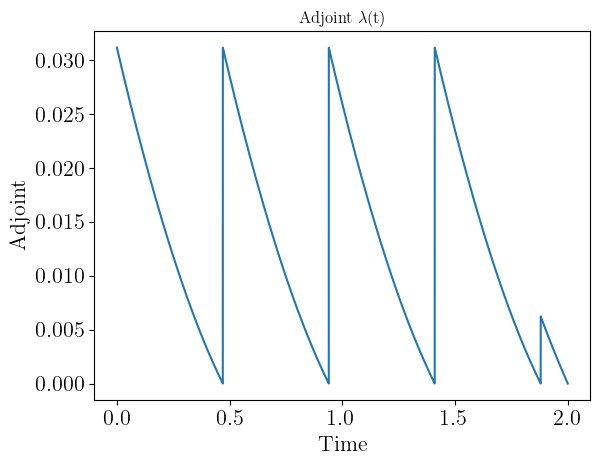

Gradient of the loss: [[ 0.00845702 -0.00614438 -0.02613362 -0.09965553]]


In [ ]:
##################### Test of the backpropagator #####################
backpropagator = BackpropagationPerceptronCEL(model, criterion)
grad = backpropagator(vt, t, t_spikes, example_x_time, print_adjoint = True)
print(f'Gradient of the loss: {grad}')
######################################################################

As we see, it looks good!

### **4.1.5.- Optimisation through Gradient Descent**

Now that we have the gradient of the loss with respect to the learnable parameters, the last step is to perform an iteration of gradient descent. Since multiple alternatives can be implemented on top of the vanilla gradient descent algorithm, the following abstract class implements a general-purpose optimiser:

In [18]:
################################## Abstract class for the optimiser ##################################
class NeuralOptimizer(ABC):
  def __init__(self, backpropagator: Backpropagator, learning_rate: int):
    '''
    This method instantiates an object of the class NeuralOptimizer. It takes
    a backpropagator and a learning rate as input and stores them in order to
    optimise the learnable parameters of the model.

    Input:
      -- backpropagator: Instance of the Backpropagator class. It should contain
                         the model to be optimised, the loss function and the
                         gradient of the loss.
      -- learning_rate: Learning rate.
    Output:
      -- None.
    '''

    self.backpropagator = backpropagator
    self.learning_rate = learning_rate

  @abstractmethod
  def step(self):
    '''
    This method performs an iteration of gradient descent employing any strategy
    that drives the loss function to a local optimum through its gradient.
    '''

    pass
######################################################################################################

In our scenario, and as noted in the report, optimising the learnable parameters requires applying a step of the gradient descent technique by employing the partial derivatives that we have just calculated. This notebook implements the vanilla gradient descent technique, where parameters are updated following the opposite direction of the gradient of the loss with respect to the parameters, as follows:
$$
\theta_{j+1} = \theta_j - \alpha \nabla_{\theta_j} L.
$$
We encourage you to implement RMSProp or Adam and compare the results obtained!

The following class contains the implementation of an optimisation step employing the vanilla gradient descent technique:

In [19]:
################################## Class for the optimiser ##################################
class GradientDescent(NeuralOptimizer):
  def __init__(self, backpropagator: Backpropagator, learning_rate):
    '''
    This method instantiates an object of the class GradientDescent. It takes
    a backpropagator and a learning rate as input and stores them in order to
    optimise the learnable parameters of the model.

    Input:
      -- backpropagator: Instance of the Backpropagator class. It should contain
                         the model to be optimised, the loss function and the
                         gradient of the loss.
      -- learning_rate: Learning rate.
    Output:
      -- None.
    '''

    super().__init__(backpropagator, learning_rate)

  def step(self):
    '''
    This method performs an iteration of gradient descent employing the vanilla
    strategy that drives the loss function to a local optimum through its gradient.
    '''

    if self.backpropagator.grad.any() != None:
      self.backpropagator.model.parameters['W'] = self.backpropagator.model.parameters['W'] - self.learning_rate*self.backpropagator.grad[:,:-2]
      self.backpropagator.model.parameters['b'] = self.backpropagator.model.parameters['b'] - self.learning_rate*self.backpropagator.grad[:,-2]
      self.backpropagator.model.parameters['phi'] = self.backpropagator.model.parameters['phi'] - self.learning_rate*self.backpropagator.grad[:,-1]

    else:
      raise Exception('Parameters can not be updated before computing the gradient of the loss.')
#############################################################################################

Gorgeous! We now have all the components we need to train the model!

## **4.2.- Training for a Single Instance. Learning Patterns**

Before training on the whole dataset, let us perform a modest training to see whether the model's learning patterns effectively adjust to the nature of the data being inputted. This includes learning spiking patterns for instances corresponding to the class 1, while learning non-spiking patterns for instances of the class 0.

The following function implements a training procedure that trains the model for a given number of iterations on a single instance. We shall later extend this function to consider the whole dataset.

In [20]:
#################################################### Training function ####################################################
def trainODEPerceptron(model, loss_fn, backpropagator, optimizer, X, Y, time_frame, num_iterations = 5000, print_cost=False):
    '''
    Training function for a single instance.

    Input:
      -- model: Neural model to optimise.
      -- loss_fn: Instance of the Loss class containing the loss function
                  that will determine the model's performance.
      -- backpropagator: Instance of the Backpropagator class, containing
                         the object that will compute the gradient of the loss.
      -- optimizer: Instance of the NeuralOptimizer class, containing the
                    optimisation strategy.
      -- X: Instance on which to train the model. Shape: (L, num_features).
      -- Y: Scalar indicating the class the instance belongs to.
      -- time_frame: Time range containing the discrete time steps considered.
      -- num_iterations: Number of epochs to train the model.
      -- print_cost: If not False, it will print the evolution of the loss
                     function once every k iterations.
    Output:
      -- None.
    '''

    costs = np.array([]) # Array to store the evolution of the loss.
    cost = 0

    for i in range(0, num_iterations):
      Y_hat, vt, t_spikes = model.forward(X, time_frame) # Forward pass.
      Y_hat = np.array([[Y_hat]])

      loss = loss_fn.loss(Y_hat, Y) # Loss calculation.
      cost += loss

      backpropagator.backward(vt, time_frame, t_spikes, X) # Gradient computation.

      optimizer.step() # Gradient descent step.

      # Print cost every k iterations (if provided).
      if print_cost and i % print_cost == 0:
        print(f"Cost after iteration {i}: {cost} (per {print_cost} iteration(s))")
        costs = np.append(costs, cost)
        cost = 0

    # Graph visualising the evolution of the loss function.
    if print_cost:
      plt.plot(np.squeeze(costs), color="red", label="train")
      plt.ylabel('Cost', fontsize=20)
      plt.xlabel('Iteration', fontsize=20)
      plt.title(f"Learning rate = {str(optimizer.learning_rate)}, gain = {model.gain}", fontsize=20)
      plt.legend()
      plt.show()
#################################################################################################################################################

Gorgeous! Let us train the model on one example that belongs to the class 1. We will take data transformed through zero-order hold modelling, but you can try the other alternative. You can also play with the hyperparameters.

Cost after iteration 0: 0.04319052705104076 (per 1 iteration(s))
Cost after iteration 1: 0.04302191211220324 (per 1 iteration(s))
Cost after iteration 2: 0.0428210240583309 (per 1 iteration(s))
Cost after iteration 3: 0.04262133209344737 (per 1 iteration(s))
Cost after iteration 4: 0.04240149433575536 (per 1 iteration(s))
Cost after iteration 5: 0.04219377941078619 (per 1 iteration(s))
Cost after iteration 6: 0.041966190829169504 (per 1 iteration(s))
Cost after iteration 7: 0.04172998490657277 (per 1 iteration(s))
Cost after iteration 8: 0.041495649146588556 (per 1 iteration(s))
Cost after iteration 9: 0.0412629311628312 (per 1 iteration(s))
Cost after iteration 10: 0.04100156391006869 (per 1 iteration(s))
Cost after iteration 11: 0.04073292292303156 (per 1 iteration(s))
Cost after iteration 12: 0.040486717499458244 (per 1 iteration(s))
Cost after iteration 13: 0.0402129605663257 (per 1 iteration(s))
Cost after iteration 14: 0.03994202295803975 (per 1 iteration(s))
Cost after iteration

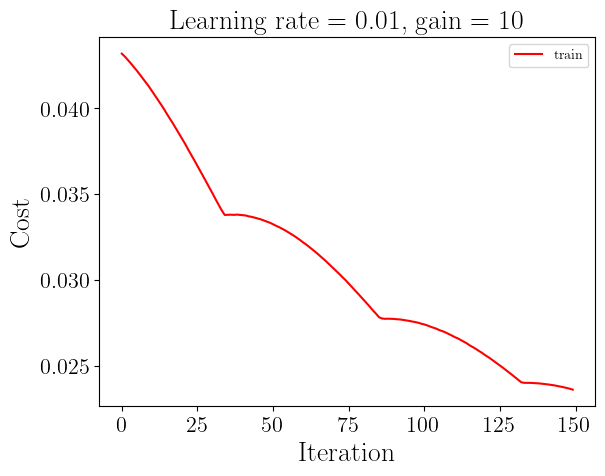

In [ ]:
################################################## Training ##################################################
model = NeuralQIFODEPerceptron(2, 1, gain=10)
criterion = CrossEntropyLoss()
backpropagator = BackpropagationPerceptronCEL(model, criterion)
optimizer = GradientDescent(backpropagator, 0.01)

# Eta jarraian entrenamendua:
trainODEPerceptron(model, criterion, backpropagator, optimizer, X_train_zoh[1], y_train[1], t, num_iterations=150, print_cost = 1)
###################################################################################################################

Training seems to follow a typical pattern. This is good news! Let's see whether the neuron has learnt that it has to produce spiking behaviour for this instance (since it belongs to the class 1):

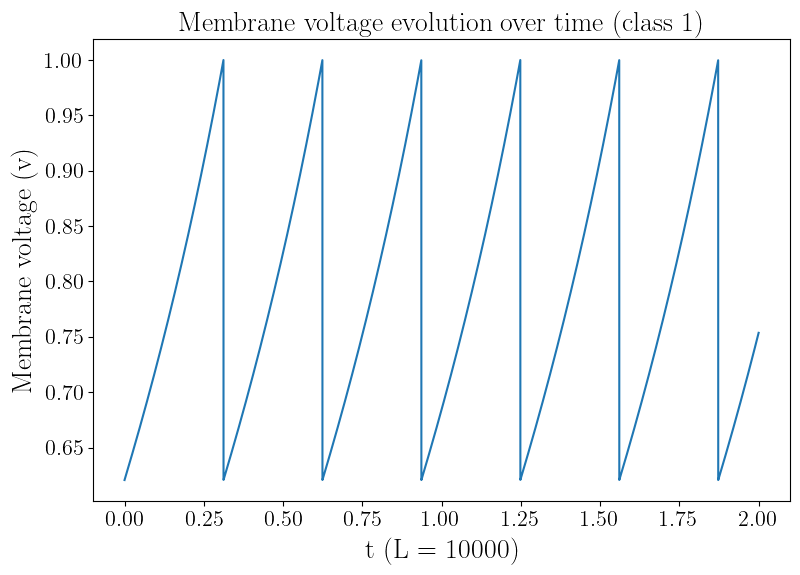

In [ ]:
####################### Verification of the neuron's behaviour #######################
y_hat, vt, t_spikes = model.forward(X_train_zoh[1], t)

fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(111)
ax.plot(t, vt)
ax.set_xlabel('t (L = 10000)', fontsize = 20, labelpad=5)
ax.set_ylabel('Membrane voltage (v)', fontsize = 20, labelpad=5)

plt.title('Membrane voltage evolution over time (class 1)', fontsize = 20)
plt.savefig('class_1_zoh.png', dpi=300, transparent=True)
plt.show()
######################################################################################

This looks really good! It seems our implementation is, at least, coherent. However, now we need to try to solve the concentric circumferences problem...

## **4.3.- Solving Concentric Circumferences**

In order to train the model on top of the whole dataset, we will implement a function that let's doing so. In addition, we will include the option to apply batched learning, such that the gradient is averaged over a batch before applying gradient descent. The following function does so.

In [21]:
#################################################### Entrenamendurako funtzioaren definizioa ####################################################
def trainODEPerceptronFull(model, loss_fn, backpropagator, optimizer, X, Y, time_frame, batch_size = 16, num_iterations = 5000, print_cost=0):
    '''
    Training function for a single instance.

    Input:
      -- model: Neural model to optimise.
      -- loss_fn: Instance of the Loss class containing the loss function
                  that will determine the model's performance.
      -- backpropagator: Instance of the Backpropagator class, containing
                         the object that will compute the gradient of the loss.
      -- optimizer: Instance of the NeuralOptimizer class, containing the
                    optimisation strategy.
      -- X: Instance on which to train the model. Shape: (num_examples, L, num_features).
      -- Y: Vector of labels. Shape: (num_examples,).
      -- time_frame: Time range containing the discrete time steps considered.
      -- batch_size: Number of examples to consider before applying gradient descent.
                     The gradient of the loss will be averaged among the examples in
                     the batch.
      -- num_iterations: Number of epochs to train the model.
      -- print_cost: If not False, it will print the evolution of the loss
                     function once every k iterations.
    Output:
      -- None.
    '''

    costs = np.array([]) # Array to store the evolution of the loss.
    cost = 0
    grad = np.zeros((1, len(model.parameters['W'][0]) + 2)) # In case batched learning is to be applied.

    # Optimisation.
    for i in range(0, num_iterations):
      for j in range(0, len(X), batch_size):
        for k in range(batch_size):
          if j+k >= len(X):
            break

          X_example = X[j+k] # Selection of the k-th instance in the batch.
          Y_example = np.array([Y[j+k]])

          Y_hat, vt, t_spikes = model.forward(X_example, time_frame) # Forward pass.
          Y_hat = np.array([[Y_hat]])

          loss = loss_fn.loss(Y_hat, Y_example) # Loss calculation.
          cost += loss

          grad += backpropagator.backward(vt, time_frame, t_spikes, X_example) # Gradient computation. Gradient is accumulated.

        optimizer.backpropagator.grad = grad/batch_size # Average of the gradient among the instances of the batch.
        optimizer.step() # Optimisation via gradient descent.
        grad = np.zeros((1, len(model.parameters['W'][0]) + 2))

      # Print cost every k iterations (if provided).
      if print_cost and i % print_cost == 0:
        print("Cost after iteration %i: %f" %(i, cost))
        costs = np.append(costs, cost)
        cost = 0

    # Graph visualising the evolution of the loss function.
    if print_cost:
      plt.plot(np.squeeze(costs), color="red")
      plt.ylabel('Cost', fontsize=20)
      plt.xlabel(f'Iteration', fontsize=20)
      plt.title(f"Learning rate = {str(optimizer.learning_rate)}, gain = {model.gain}", fontsize=20)
      plt.savefig('cost_evolution.png', dpi=300)
      plt.show()
#################################################################################################################################################

Surely, we also need to evaluate the model's performance. Therefore, the following function implements the accuracy scoring metric:

In [22]:
############################## Accuracy ##############################
def accuracy(model, X_test, Y_test, time_frame):
  '''
  This method computes accuracy of a model given a dataset and
  the ground truth:
    acc = (1/len(X_test))*sum(Y_hat == Y_test)

  Input:
    -- model: Model whose accuracy is to be computed.
    -- X_test: Testing dataset.
    -- Y_test: Ground truth.
    -- time_frame: Time range containing the discrete time steps considered.
  Output:
    -- accuracy: Accuracy score.
  '''

  sum = 0
  for i in range(len(X_test)):
    example = X_test[i]
    Y_hat, _, _ = model.forward(example, time_frame)

    if Y_hat >= 0.5 and Y_test[i] == 1:
      sum += 1
    elif Y_hat < 0.5 and Y_test[i] == 0:
      sum += 1

  return sum/len(X_test)
######################################################################

Perfect! Let's do a quick test to see if the model trains correctly on top of this dataset and see whether it performs as expected, whether it solves the problem, whether it exhibits suboptimal performance, etc. The following trains the model for 10 iterations over the instances transformed through zero-order hold:

Cost after iteration 0: 88.212238
Cost after iteration 1: 83.774512
Cost after iteration 2: 79.604127
Cost after iteration 3: 75.810483
Cost after iteration 4: 72.462936
Cost after iteration 5: 69.649915
Cost after iteration 6: 67.381097
Cost after iteration 7: 65.442734
Cost after iteration 8: 63.986240
Cost after iteration 9: 62.827019


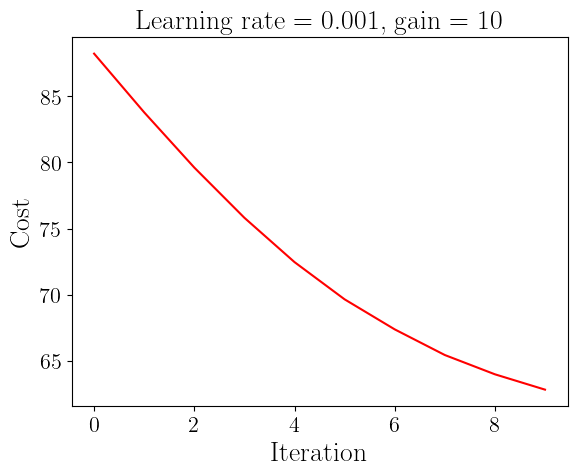

In [23]:
############################# Training of the model #############################
model = NeuralQIFODEPerceptron(2, 1, gain=10)
criterion = CrossEntropyLoss()
backpropagator = BackpropagationPerceptronCEL(model, criterion)
optimizer = GradientDescent(backpropagator, 0.001)

# Training
trainODEPerceptronFull(model, criterion, backpropagator, optimizer, X_train_zoh, y_train, t, batch_size = 1, num_iterations=10, print_cost = 1)
#################################################################################

Training patterns seem coherent, but let's see the result:

In [24]:
############# Evaluation of the model #############
acc = accuracy(model, X_train_zoh, y_train, t)
print(f'Accuracy of the model: {acc}.')
###################################################

Accuracy of the model: 0.45.


Well, although training seems coherent, results show the model has not been able to solve the problem in this trial. You can execute training other times, but you will not reach to a valid solution, at least we have not been successful through zero-order hold. That is the reason we will offer the solution we have found for the dynamical source of input transformation strategy below.

### **4.3.1.- Solution to Concentric Circumferences through Dynamical Source of Input**

As commented, if you want to directly work with the solution we have obtained, here you have the parameters for the model when training after transforming data into the zero-order hold model:

In [25]:
###################### Solution parameters for DSI technique ######################
model = NeuralQIFODEPerceptron(2, 0.7, gain=10)
model.parameters['W'] = np.array([[-5.7601033, 8.64606573]])
model.parameters['b'] = np.array([[2.19796426]])
model.parameters['phi'] = np.array([[-0.20237278]])
model.v_peak = 0.7
###################################################################################

Let's check accuracy:

In [26]:
############# Evaluation of the model #############
acc = accuracy(model, X_train_dsi, y_train, t)
print(f'Accuracy of the model: {acc}.')
###################################################

Accuracy of the model: 1.0.


Gorgeous! In addition, if you want to see what the model has learnt, the following code generates the decision boundary for this case:

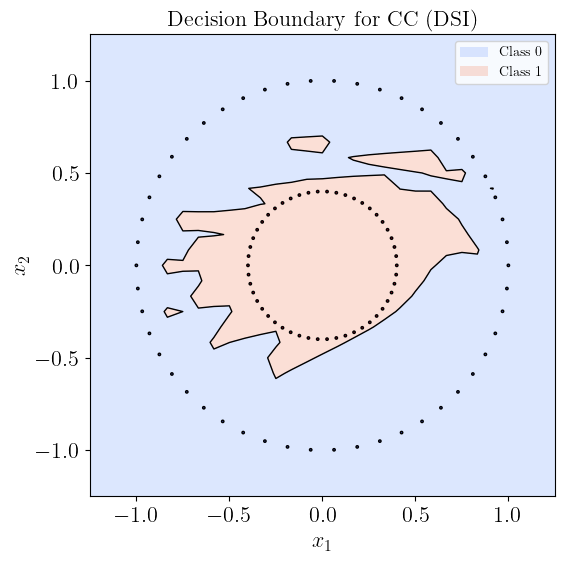

In [34]:
##################### Decision boundary for DSI #####################
# Generation of the grid of points.
n_points = 31
x1 = np.linspace(-1.25, 1.25, n_points)
x2 = np.linspace(-1.25, 1.25, n_points)
xx, yy = np.meshgrid(x1, x2)
grid = np.stack([xx.ravel(), yy.ravel()], axis=1)

# Transformation of the discrete points.
grid_time = dynamicalSourceInput(grid, 12, L, t1, t2)

# Prediction for each point.
preds = np.zeros((n_points**2,))
for i in range(len(grid_time)):
  preds[i] = model.forward(grid_time[i], t)[0]
Z = preds.reshape(n_points, n_points)

# Plotting of the decision boundary.
plt.figure(figsize=(6,6))
cs = plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap="coolwarm")
plt.contour(xx, yy, Z, levels=[0.5], colors="k", linewidths=1)
plt.scatter(X_train[:,0], X_train[:,1],
            c=y_train, cmap="coolwarm", edgecolor="k", s=3, linewidth=1)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.xlabel("$x_1$", fontsize = 16)
plt.ylabel("$x_2$", fontsize = 16)
plt.title("Decision Boundary for CC (DSI)", fontsize = 16)
plt.legend(handles=cs.legend_elements()[0], labels=["Class 0", "Class 1"])
plt.savefig('boundary_dsi.png', dpi=300, transparent=True)
plt.show()
#####################################################################

Although a little messy, we have a valid solution!

Thank you very much for the time invested in this notebook!